In [31]:
import numpy as np

In [32]:
from data_prep import *
from build_and_train import *

In [33]:
train, valid, test = retrieve_data()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [34]:
import pickle
  
# Open the file in binary mode
def get_train_valid_test():
    with open('/Users/sudharsangopalakrishnan/VRSN-and-Deep-Sentigram/data/variables/train.pkl', 'rb') as file:
        
        # Call load method to deserialze
        train = pickle.load(file)
    with open('/Users/sudharsangopalakrishnan/VRSN-and-Deep-Sentigram/data/variables/valid.pkl', 'rb') as file:
        
        # Call load method to deserialze
        valid = pickle.load(file)
    with open('/Users/sudharsangopalakrishnan/VRSN-and-Deep-Sentigram/data/variables/test.pkl', 'rb') as file:
        
        # Call load method to deserialze
        test = pickle.load(file)
  
    return train, valid, test

In [35]:
(X_train, X_valid, X_test), (y_train, y_valid, y_test) = split_train_valid_test(train, valid, test)

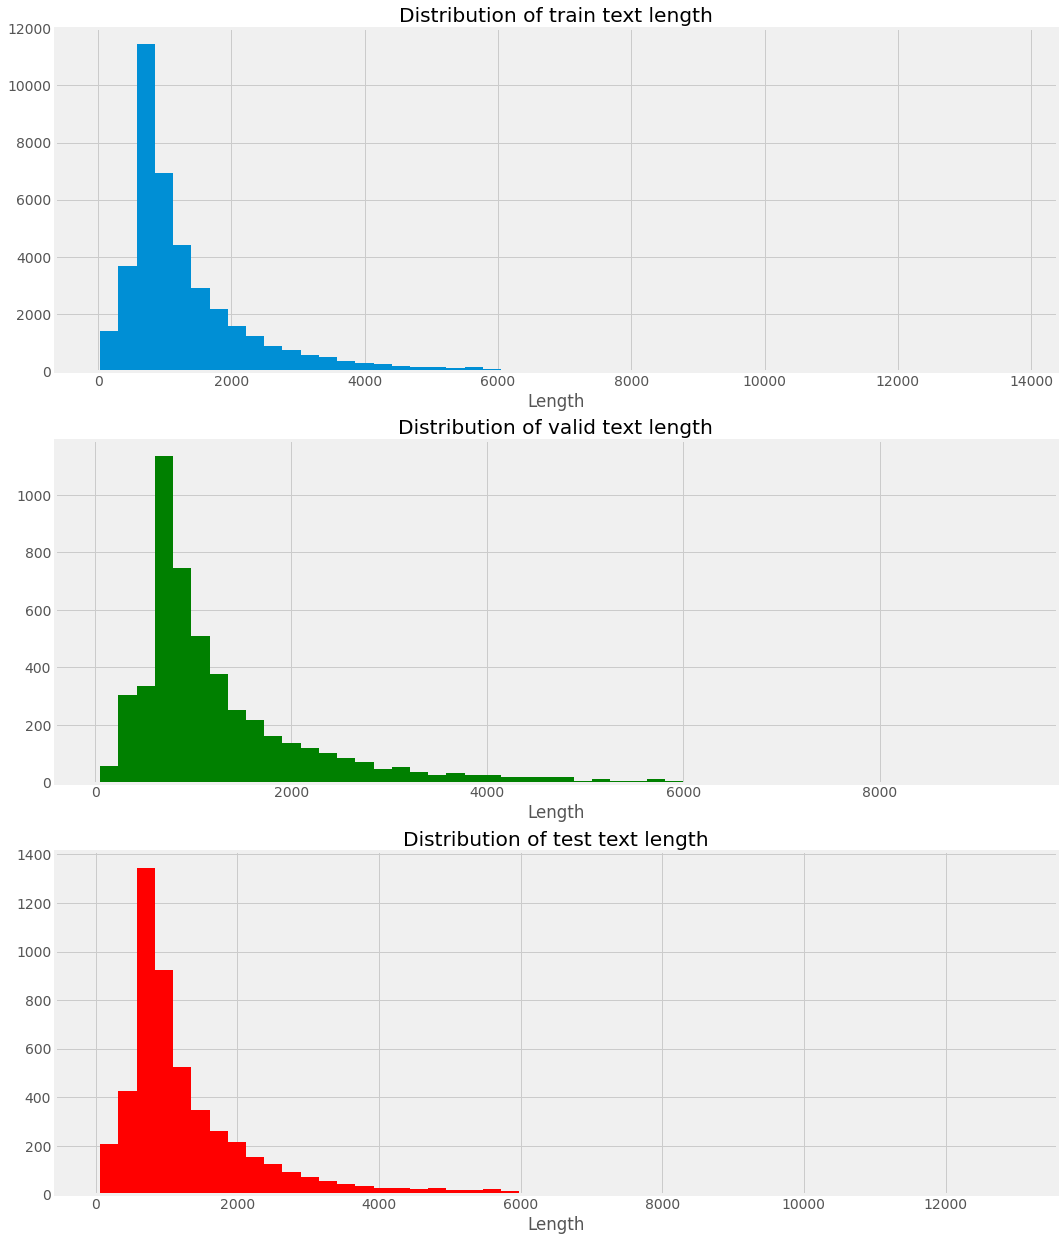

In [36]:
view_text_length(X_train, X_valid, X_test)

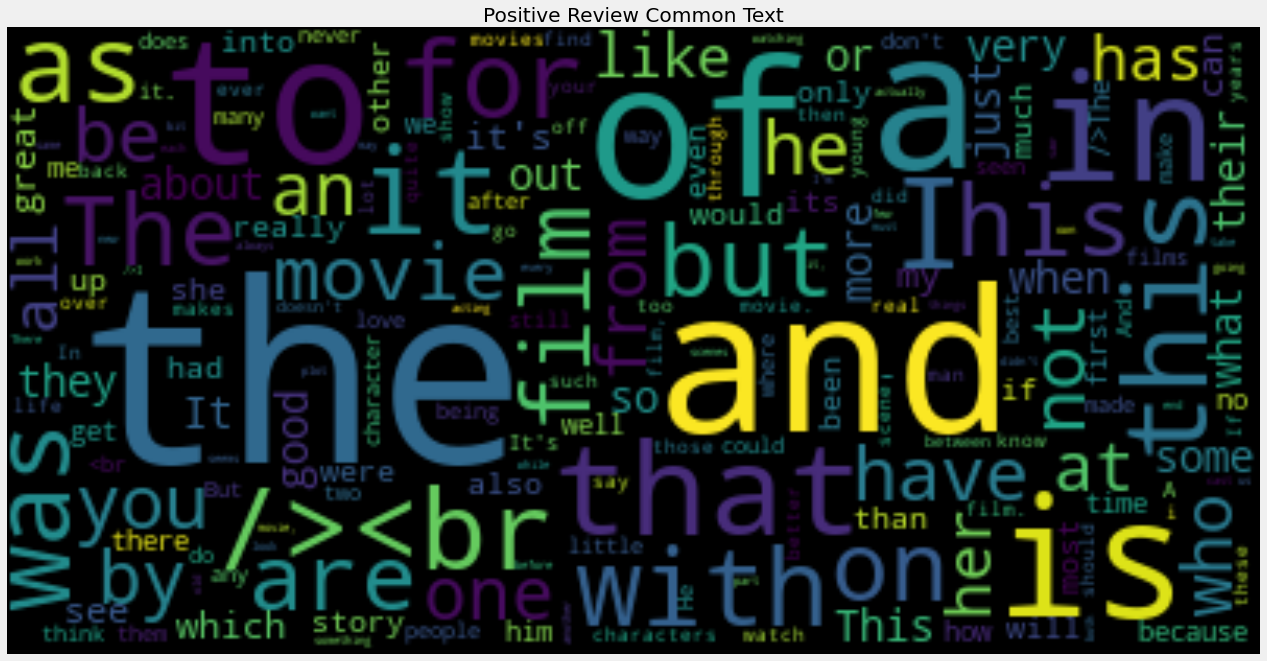

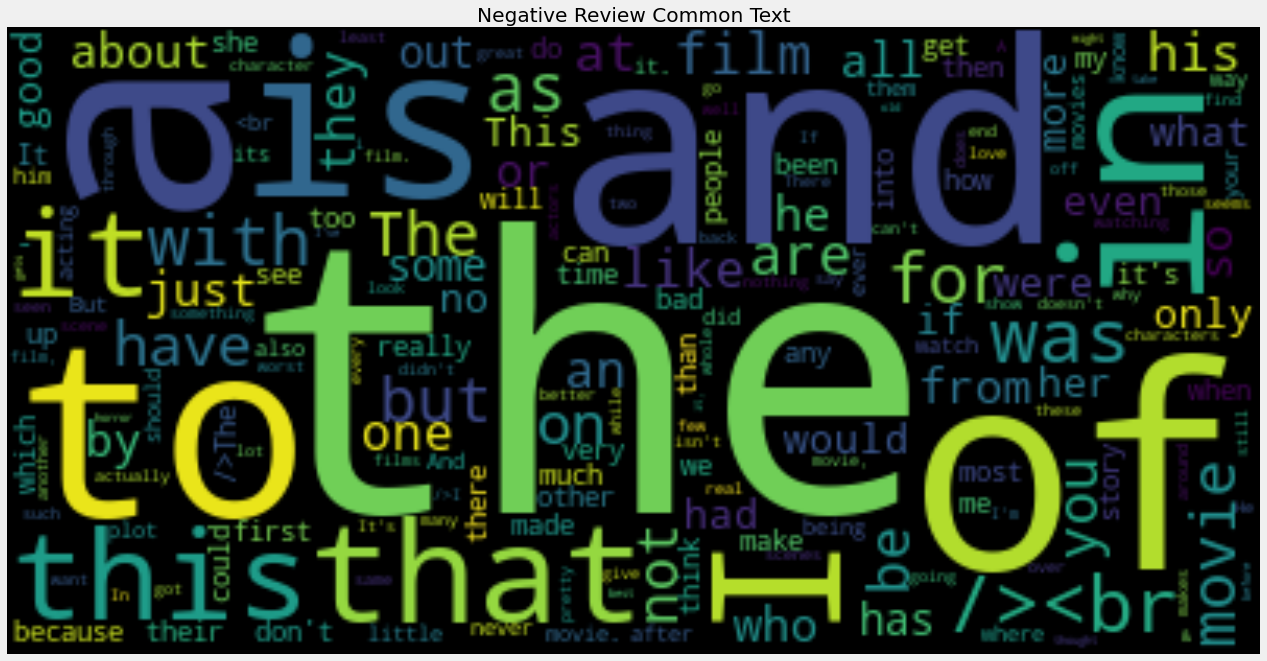

In [37]:
view_wordclouds(train)

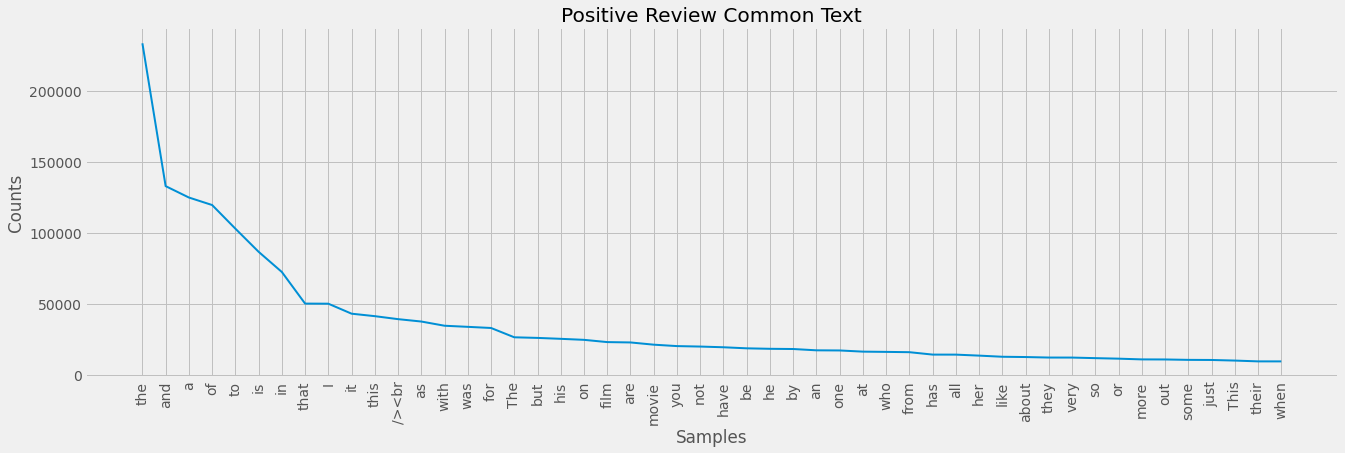

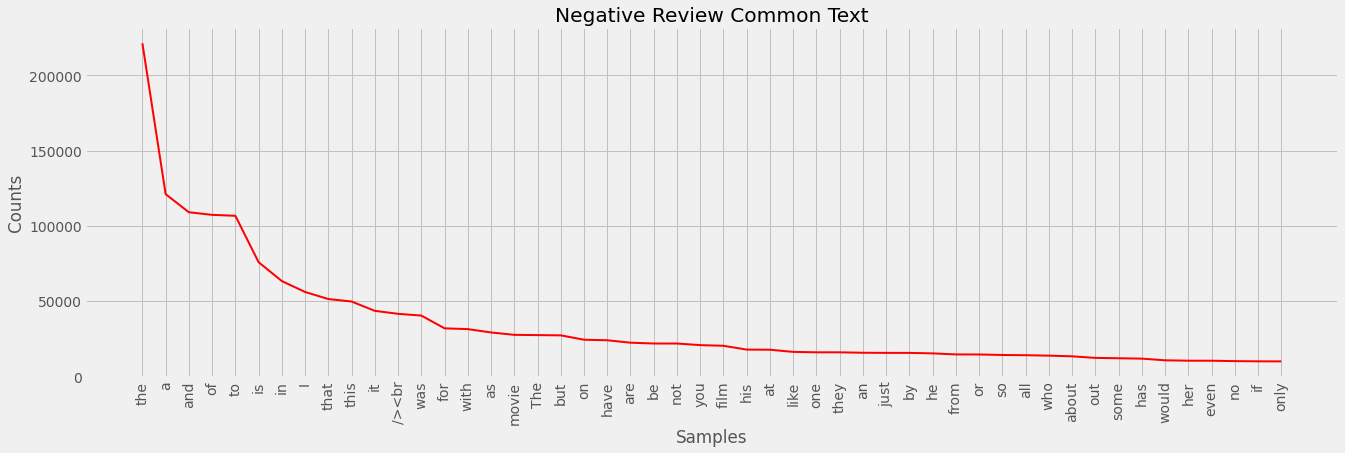

In [38]:
view_common_words(train)

In [39]:
X_train, X_valid, X_test, size_of_vocabulary = prepare_data(X_train, X_valid, X_test)

Vocabulary Size: 112204


In [17]:
model, es, mc = build_BiLSTM(1, size_of_vocabulary)

2022-07-15 12:04:45.411261: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 128)          18000768  
                                                                 
 bidirectional (Bidirectiona  (None, 120, 128)         98816     
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3

In [18]:
model, history = fit(model, X_train, X_valid, y_train, y_valid, es, mc)

Epoch 1/4
313/313 [==============================] - ETA: 0s - loss: 0.3692 - accuracy: 0.8284
Epoch 1: val_accuracy improved from -inf to 0.88780, saving model to best_model.h5
313/313 [==============================] - 146s 452ms/step - loss: 0.3692 - accuracy: 0.8284 - val_loss: 0.2645 - val_accuracy: 0.8878
Epoch 2/4
313/313 [==============================] - ETA: 0s - loss: 0.1542 - accuracy: 0.9442
Epoch 2: val_accuracy did not improve from 0.88780
313/313 [==============================] - 136s 435ms/step - loss: 0.1542 - accuracy: 0.9442 - val_loss: 0.2843 - val_accuracy: 0.8840
Epoch 3/4
313/313 [==============================] - ETA: 0s - loss: 0.0663 - accuracy: 0.9784
Epoch 3: val_accuracy did not improve from 0.88780
313/313 [==============================] - 130s 417ms/step - loss: 0.0663 - accuracy: 0.9784 - val_loss: 0.3812 - val_accuracy: 0.8754
Epoch 4/4
313/313 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.9894
Epoch 4: val_accuracy did not 

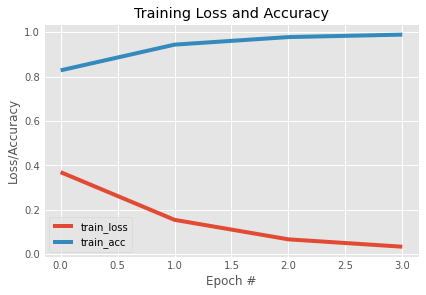

In [19]:
plot_training(history)

In [20]:
get_accuracy_and_loss(model, X_test, y_test)

157/157 [==============================] - 4s 26ms/step - loss: 0.4561 - accuracy: 0.8748
Test Accuracy: 87.48000264167786%
Test Loss: 0.8748000264167786%


(0.8748000264167786, 0.45613646507263184)

In [41]:
X_train.shape

(40000, 120)